In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [7]:
df = pd.read_csv('japan_population.csv')
df.head()
df[(df["集計年"]==1960) & (df["都道府県コード"]>=8) & (df["都道府県コード"]<=14)]

,集計年,都道府県コード,都道府県名,総人口
7,1960,8,茨城県,2047024.0
8,1960,9,栃木県,1513624.0
9,1960,10,群馬県,1578476.0
10,1960,11,埼玉県,2430871.0
11,1960,12,千葉県,2306010.0
12,1960,13,東京都,9683802.0
13,1960,14,神奈川県,3443176.0


In [11]:
#1960から2015までを機械学習にかける、ゆえに56行、それが7都道府県分あるので56＊7行
#また関東の都道府県は7個つまりマッピングすると6列、これに人口の列を足して計7列
X = np.zeros((56*7,7),dtype=np.uint32)
y = np.zeros(56*7,dtype=np.uint32)

cnt = 0
for i in range(47*56):
    pref_code = df.iloc[i,1]
    population = df.iloc[i,3]
    next_population = df.iloc[i+47,3]
    
    if 8<=pref_code and 14>=pref_code:
        if pref_code<14:
            X[cnt][pref_code-8] = 1
            
        X[cnt][6] = population
        y[cnt] = next_population
            
        cnt+=1
        
X[0:10]

array([[      1,       0,       0,       0,       0,       0, 2047024],
       [      0,       1,       0,       0,       0,       0, 1513624],
       [      0,       0,       1,       0,       0,       0, 1578476],
       [      0,       0,       0,       1,       0,       0, 2430871],
       [      0,       0,       0,       0,       1,       0, 2306010],
       [      0,       0,       0,       0,       0,       1, 9683802],
       [      0,       0,       0,       0,       0,       0, 3443176],
       [      1,       0,       0,       0,       0,       0, 2053000],
       [      0,       1,       0,       0,       0,       0, 1513000],
       [      0,       0,       1,       0,       0,       0, 1581000]],
      dtype=uint32)

In [25]:
df1 = df[(df["都道府県コード"]>=8) & (df["都道府県コード"]<=14) & (df["集計年"]<=2015)]
#df1.head(50)
df1_mapping = pd.get_dummies(df1[["都道府県名","総人口"]],drop_first=True)
df1_mapping.head(14)
#print(df1_mapping.shape)

,総人口,都道府県名_埼玉県,都道府県名_東京都,都道府県名_栃木県,都道府県名_神奈川県,都道府県名_群馬県,都道府県名_茨城県
7,2047024.0,0,0,0,0,0,1
8,1513624.0,0,0,1,0,0,0
9,1578476.0,0,0,0,0,1,0
10,2430871.0,1,0,0,0,0,0
11,2306010.0,0,0,0,0,0,0
12,9683802.0,0,1,0,0,0,0
13,3443176.0,0,0,0,1,0,0
54,2053000.0,0,0,0,0,0,1
55,1513000.0,0,0,1,0,0,0
56,1581000.0,0,0,0,0,1,0


In [36]:
y1 = df[(df["都道府県コード"]>=8) & (df["都道府県コード"]<=14) & (df["集計年"]<=2016) & (df["集計年"]>=1961)]
y1.head()
y1 = y1["総人口"]
y1.head()

54    2053000.0
55    1513000.0
56    1581000.0
57    2497000.0
58    2356000.0
Name: 総人口, dtype: float64

In [60]:
X1 = df1_mapping.values
X1 = np.array(X1,dtype=np.int32)
y1 = np.array(y1,dtype=np.int32)
print(X1[0:14])
print(y1[0:14])
X1.ndim

[[2047024       0       0       0       0       0       1]
 [1513624       0       0       1       0       0       0]
 [1578476       0       0       0       0       1       0]
 [2430871       1       0       0       0       0       0]
 [2306010       0       0       0       0       0       0]
 [9683802       0       1       0       0       0       0]
 [3443176       0       0       0       1       0       0]
 [2053000       0       0       0       0       0       1]
 [1513000       0       0       1       0       0       0]
 [1581000       0       0       0       0       1       0]
 [2497000       1       0       0       0       0       0]
 [2356000       0       0       0       0       0       0]
 [9967000       0       1       0       0       0       0]
 [3606000       0       0       0       1       0       0]]
[ 2053000  1513000  1581000  2497000  2356000  9967000  3606000  2056000
  1513000  1584000  2588000  2428000 10224000  3801000]


2

In [47]:
X1_train = X1[:350]
X1_test = X1[350:]
y1_train = y1[:350]
y1_test = y1[350:]

In [49]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 2976504  2011342  2011854  7234625  6247455 13182582  9095368  2967043
  2003902  2005009  7248612  6248144 13219973  9106668  2954454  1996155
  1998231  7255390  6231681 13254834  9116352  2944770  1990345  1990484
  7267011  6232650 13325526  9129909  2935086  1984534  1983705  7285410
  6240397 13414617  9148308  2925379  1978971  1978006  7304327  6253631
 13527211  9170788]
[ 2960000  2000000  2001000  7209000  6217000 13198000  9060000  2947000
  1992000  1994000  7216000  6200000 13234000  9070000  2937000  1986000
  1986000  7228000  6201000 13307000  9084000  2927000  1980000  1979000
  7247000  6209000 13399000  9103000  2916976  1974255  1973115  7266534
  6222666 13515271  9126214  2905000  1966000  1967000  7289000  6236000
 13624000  9145000]


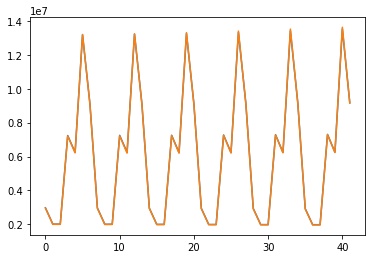

In [58]:
y1_pred = model1.predict(X1_test)
y1_pred = np.array(y1_pred,dtype=np.int32)
print(y1_pred)
print(y1_test)
import matplotlib.pyplot as plt
plt.plot(y1_pred)
plt.plot(y1_test)

In [65]:
S = input()
number_of_C = S.count("C")
number_of_c = S.count("c")
total_c = number_of_C + number_of_c
print(total_c)

cccCCC
6
